# Đồ án Thực Hành Lập Trình Khoa Học Dữ Liệu

In [9]:
import sys
sys.executable

'/home/tan/miniconda3/bin/python3.9'

## Import thư viện

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re
from collections import Counter

## Thu thập dữ liệu

- Nhóm sử dụng dữ liệu "steam_games.csv" được thu thập sẵn ở trên kaggle. Dữ liệu này là về các game hiện có ở trên steam. Nguồn của dữ liệu được lấy tại: https://www.kaggle.com/datasets/tristan581/all-55000-games-on-steam-november-2022
- LICENSE của dữ liệu là [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/), người dùng được phép sử dụng với mục đích phi thương mại và phải credit cho chủ sở hữu
- Người ta đã thu thập dữ liệu này bằng cách sử dụng API của steam store và API của web thứ ba (steamspy.com)

## Khám phá dữ liệu

### Đọc dữ liệu vào dataframe

In [11]:
steam_df = pd.read_csv('steam_games.csv', sep = ';')
steam_df.head()

/tmp/ipykernel_3657/3187035008.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  steam_df = pd.read_csv('steam_games.csv', sep = ';')


,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


### Dữ liệu có bao nhiêu dòng, bao nhiêu cột?

Tính số dòng và số cột lưu vào hai biến num_rows và num_cols

In [12]:
num_rows, num_cols = steam_df.shape
num_rows, num_cols

(55691, 22)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng cho biết thông tin của từng sản phẩm hiện có trong steam, không có dòng nào có ý nghĩa khác với các dòng còn lại.

### Tiến hành kiểm tra các dòng có bị lặp không

Kiểm tra bằng cách lưu kết quả vào biến `have_duplicated_rows`. Biến này có giá trị True nếu dữ liệu có các dòng bị lặp và False nếu ngược lại.

In [13]:
duplicated_list = steam_df.duplicated()
if True in duplicated_list:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
have_duplicated_rows

False

Không có dòng nào bị lặp cả

### Mỗi cột có ý nghĩa gì?

Theo mô tả trên kaggle, các cột có ý nghĩa như sau:
- App ID: ID của sản phẩm
- Name: Tên sản phẩm
- Short Description: Phần giới thiệu sản phẩm
- Developer: Nhà phát triển sản phẩm
- Publisher: Nhà phân phối sản phẩm
- Genre: Các thể loại của sản phẩm
- Tags: Các tag được gán cho sản phẩm (từ người dùng)
- Type: Cho biết sản phẩm thuộc loại game hay là phần cứng (các phần mềm không phải game cũng được gán giá trị là game)
- Categories: Các hạng mục/đặc trưng của sản phẩm
- Owners: Số lượng người sở hữu sản phẩm
- Positive Reviews: Số lượt đánh giá tích cực 
- Negative Reviews: Số lượt đánh giá tiêu cực
- Price: Giá bán hiện tại của game (tính theo USD)
- Initial Price: Giá bán của game thời điểm mới phát hành (USD)
- Discount: Phần trăm giảm giá của game
- CCU: Số lượng người chơi đồng thời cao nhất (tính vào ngày 8/11/2021)
- Languages: Các ngôn ngữ mà sản phẩm có hỗ trợ
- Platforms: Các nền tảng mà sản phẩm hỗ trợ
- Release Date: Ngày phát hành sản phẩm
- Required Age: Độ tuổi giới hạn
- Website: Trang web của nhà phát triển/nhà phân phối
- Header Image: Đường link lưu ảnh của sản phẩm

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [14]:
steam_df.columns

Index(['App ID', 'Name', 'Short Description', 'Developer', 'Publisher',
       'Genre', 'Tags', 'Type', 'Categories', 'Owners', 'Positive Reviews',
       'Negative Reviews', 'Price', 'Initial Price', 'Discount', 'CCU',
       'Languages', 'Platforms', 'Release Date', 'Required Age', 'Website',
       'Header Image'],
      dtype='object')

- Lúc đọc dữ liệu từ "steam_games.csv", ta có thể thấy warning là:"Columns (19) have mixed types.", nghĩa là cột 19(Required Age) có dtype không đồng nhất.<br>
- Release Date cần đưa về dạng datetime<br>

In [15]:
steam_df.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


In [16]:
col_dtypes=steam_df.dtypes
col_dtypes

App ID                int64
Name                 object
Short Description    object
Developer            object
Publisher            object
Genre                object
Tags                 object
Type                 object
Categories           object
Owners               object
Positive Reviews      int64
Negative Reviews      int64
Price                 int64
Initial Price         int64
Discount              int64
CCU                   int64
Languages            object
Platforms            object
Release Date         object
Required Age         object
Website              object
Header Image         object
dtype: object

In [ ]:
steam_df['Required Age'].unique()

In [17]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))
    return dtypes
open_object_dtype(steam_df['Required Age'])
# USK 0 =PEGI 3: phù hợp

{int, str}

- Steam(*https://store.steampowered.com/*) là một nền tảng phân phối trực tuyến, quản lý bản quyền kỹ thuật số, trò chơi điện tử nhiều người chơi, và dịch vụ giao tiếp xã hội trên nền internet phát triển bởi Valve Corporation. Nên các trò chơi điện tử của các quốc gia khác nhau có giới hạn độ tuổi(**Required Age**) khác nhau, sau đây để dễ so sánh và tổng hợp, nhóm mình(em) xin được quy những giới hạn độ tuổi về thang PEGI(*https://pegi.info/what-do-the-labels-mean*).<br>
- Ở cột **Requied Age** ta xử lý chuyển đổi thông tin thành dạng sau đây:<br>
	- 3(PEGI 3) – suitable for all ages, 
	- 7(PEGI 7) – suitable for young children (age>=7)
	- 12(PEGI 12) – suitable for children 12 and over (age>=12)
	- 16(PEGI 16) – suitable for children 16 and over (age>=16)
	- 18(PEGI 18) – Only suitable for adults (age>=18)

In [18]:
def trans_age(type_age):
    l_age=re.findall(r'\d{1,2}',str(type_age))
    age=int(l_age[0])
    if age>=18:
        return 18
    elif age>=16:
        return 16
    elif age>=12:
        return 12
    elif age>=7:
        return 7
    return 3
steam_df['Required Age']=steam_df['Required Age'].apply(trans_age)

In [19]:
# steam_df['Release Date']=pd.to_datetime(steam_df['Release Date'],format='%Y/%m/%d')
steam_df['Release Date']=steam_df['Release Date'].astype('datetime64[s]')

### Với mỗi cột, các giá trị được phân bố như thế nào?

In [ ]:
#YOUR CODE HERE

numeric_cols=steam_df[steam_df.select_dtypes(include=[int,'datetime64[ns]']).columns]

def missing_ratio(col):
    return np.round(col.isnull().sum()/len(col)*100,4)
def min(col):
    return col.min()
def max(col):
    return col.max()

num_col_profiles_df=numeric_cols.agg([missing_ratio,min,max])
num_col_profiles_df



- Ta thực hiện kiểm tra giá trị phân bố của các biến object:
	- Với các cột **Name, Short Description,Website, Header Image** là những cột chứa thông tin đặc trưng của từng game, nên giá trị phân bố là trải rộng đều với nhau
	- Với cột **Tags** chứa thông tin của từng Genre của game nên ở đây ta cũng không xét phân bố như thế nào

In [ ]:
steam_df.head()

In [ ]:
# object_cols=steam_df[]
# display(object_cols)
object_cols=['Developer', 'Publisher', 'Genre', 'Type', 'Categories', 'Owners', 'Languages', 'Platforms']
# steam_df.select_dtypes(include=[object]).columns
print(object_cols)
# def str_to_list(col):
#     for i in col.index:
#         if type(col.at[i])==str:
#             col.at[i]=col.at[i].split(',')
#     return col
def split_str(st):
    if not (st is np.nan):
        return st.split(',')
    return []

<h3 style="color: orange">Developer</h3>

In [ ]:
pd.set_option("display.max_rows",None)
def lower_str(st):
    if not (st is np.nan):
        return st.lower()
    return ""
def convert_co_inc(st):
    if not (st is np.nan):
        st = re.sub(" *ltd.?[ .]*","ltd.,", st)
        st= re.sub(" *inc.?[ .]*","inc.,", st)
        st= re.sub(" *llc.?[ .]*","llc.,", st)
        return re.sub(r" *, *(?!inc|ltd|llc)",";", st)
    return ""
def split_dev(st):
    if not (st is np.nan):
        return st.split(';')
    return []

steam_df.Developer.apply(lower_str).apply(convert_co_inc).apply(split_dev).explode().replace("",np.nan).value_counts()

<h3 style="color: orange">Publisher</h3>

In [ ]:
steam_df.Publisher.apply(lower_str).apply(convert_co_inc).apply(split_dev).explode().replace("",np.nan).value_counts()

<h3 style="color: orange">Genre</h3>

In [ ]:
col=steam_df.Genre
col=col.apply(split_str)
col=col.explode()
col=col.str.strip()
ratio_value=col.value_counts(normalize=True).multiply(100)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

<h3 style="color: orange">Type</h3>

In [ ]:
ratio_value=steam_df.Type.value_counts(normalize=True).multiply(100)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

<h3 style="color: orange">Categories</h3>

In [ ]:
col=steam_df.Categories
col=col.apply(split_str)
col=col.explode()
col=col.str.strip()
ratio_value=col.value_counts(normalize=True).multiply(100)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

<h3 style="color: orange">Owners</h3>

In [ ]:
def split_owner(st):
    if not(st is np.nan):
        st=st.replace(',','')
        value=st.split('..')
        return (int(value[0]),int(value[1]))
    return np.nan
ratio_value=steam_df.Owners.apply(split_owner).value_counts(normalize=True).multiply(100)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

<h3 style="color: orange">Languages</h3>

In [ ]:
def clean_lang(lang_str):
    if not (lang_str is np.nan):
        return lang_str.replace('\r\n',',').replace('[b]*[/b]','').replace(';','').replace('#lang_slovakian', 'Slovak')
    return ""

col=steam_df.Languages
# Xử lý dữ liệu
col=col.apply(clean_lang).apply(split_str)
col=col.explode()
col=col.str.strip()
col=col.apply(lambda st: st.split('-')[0].strip())
col=col.replace('',np.nan)

# Xem các giá trị trong cột được phân bố như thế nào
ratio_value=col.value_counts(normalize=True).multiply(100)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

<h3 style="color: orange">Platforms</h3>

In [ ]:
col = steam_df['Platforms']
col=col.apply(split_str)
col=col.explode()
col=col.str.strip()
ratio_value=col.value_counts(normalize=True).multiply(100)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

## Đưa ra các câu hỏi

### Câu 1: Các thể loại có lượt người tag nhiều nhất. Tương quan giữa lượt tag thể loại của game đó với thể loại chính thức của game?

**Ý nghĩa khi trả lời câu hỏi:** 
* Có được cái nhìn tổng quan về từng thể loại, thể loại được người chơi công nhận nhiều nhất (thể loại mỗi game do chính người chơi tự nhìn nhận và định nghĩa)
* Biết được liệu rằng thể loại chính thức của game có giống với những gì mà người dùng trải nghiệm hay không?

**Các bước cần làm để để trả lời câu hỏi:**

* Đầu tiên ta cần đưa thông tin về lượt tag trong từng game về dưới dạng dictionary với key là thể loại và value là số lượng người dùng tag game với thể loại đó
* Tiếp đến để xét tổng quan lượt tag của từng thể loại, ta cần cộng các giá trị lượt tag của từng thể loại xuyên suốt tất cả các game với nhau và lưu vào một Series với index là tên thể loại và value là tổng số lượt tag của thể loại đó
* Với ý thứ hai, ta sẽ xét các thể loại (genres) chính thức của game bằng cách chấm điểm dựa vào số lượt tag của từng thể loại, cụ thể như sau:
    * Đối với các thể loại chính thức có ở trong phần tag, ta tính điểm bằng tỉ lệ giữa lượt tag của thể loại đó với tổng lượt tag
    * Đối với các thể loại chính thức nhưng không có trong phần tag thì ta cho điểm bằng 0
    * Từ điểm của từng thể loại, ta tính trung bình điểm bằng cách lấy tổng điểm của các thể loại chính thức đã tính ở trên chia cho tổng số thể loại.

## Tiền xử lý và phân tích dữ liệu để trả lời cho từng câu hỏi

### Tiền xử lý và phân tích cho câu 1:

**Bước 1:** Ta tạo một dataframe mới có 2 cột là `Genre` và `Tags` lấy từ dataframe gốc, với cột `Tags`, ta tiến hành chuyển đổi nó về dạng dictionary với key là thể loại và values là số lượng người dùng tag game với thể loại đó.

In [ ]:
def split_genre(x):
    if x is np.nan:
        return np.nan
    return [i.strip() for i in x.split(',')]
def split_tags(x):
    if x is np.nan:
        return []
    return [i.strip() for i in x.split(',')]
genres_tag_df = steam_df[["Genre", "Tags"]].copy()
genres_tag_df["Genre"] = genres_tag_df["Genre"].apply(split_genre)
genres_tag_df["Tags"] = genres_tag_df["Tags"].apply(split_tags)
def convert_to_dict(x: list):
    res = {}
    if len(x) == 0:
        return np.nan
    for string in x:
        key, val = string.split(': ')
        res[key] = int(val)
    return res
genres_tag_df["Tags"] = genres_tag_df["Tags"].apply(convert_to_dict)
genres_tag_df

Để tiện cho việc xử lý các bước sau, ta tiến hành bỏ đi các dòng có giá trị NaN.

In [ ]:
print('Before:', genres_tag_df.shape[0])
genres_tag_df = genres_tag_df.dropna()
print('After:', genres_tag_df.shape[0])

Có thể thấy số lượng các dòng bị bỏ đi là không đáng kể nên nhìn chung việc này sẽ không ảnh hưởng mấy đến kết quả cuối cùng.

**Bước 2:** Sau khi đã chuyển dữ liệu của cột Tags thành dictionary rồi thì ta tiến hành tính tổng số lượt tag của từng thể loại, lưu kết quả vào Series `tolal_num_tags` với mỗi dòng biểu thị số lượng tổng mỗi tag.

In [ ]:
c = Counter()
def sum_tags(row):
    c.update(row)
    return row
genres_tag_df["Tags"].apply(sum_tags)
total_num_tags = pd.Series(c, index = c.keys())
total_num_tags = total_num_tags.sort_values(ascending = False)
print(total_num_tags)
print(len(total_num_tags))

Ta có thể thấy được top 5 thể loại đang được người chơi để ý và công nhận nhất là `Action`, `Adventure`, `Indie`, `Singleplayer`, `Casual`

**Bước 3:** Chấm điểm cho các game dựa vào độ tương đồng giữa thể loại chính thức và thể loại do người chơi tag. Đầu tiên ta tiến hành tính điểm như đã mô tả ở trên và lưu dữ liệu vào một Series có tên `score`.

In [ ]:
def scoring(row):
    res = 0
    genres = row["Genre"]
    tags = row["Tags"]
    for genre in genres:
        if genre in tags.keys():
            score = tags[genre] / sum(tags.values())
        else:
            score = 0
        res += score
    return res/len(genres)
score = genres_tag_df.apply(scoring, axis = 1)
print(score)
print('Mean:', score.mean())

Theo như ta thấy, điểm trung bình độ tương đồng có vẻ thấp. Một cách để giải thích cho việc này chính là các thể loại do chính người dùng tự định nghĩa và tag là rất đa dạng, ta có thể nhìn thấy, số lượng thể loại được tag lên đến hơn 400 thể loại khác nhau trong khi số lượng thể loại chính thức do chính nhà phát hành đưa ra chỉ đâu đó tầm 30 thể loại. 
Bây giờ ta cùng thử lọc ra các game có độ tương đồng lớn hơn 0.5 xem sao.

In [ ]:
gt05 = pd.Series(score.loc[score>=0.5])
print(gt05)
print(len(gt05)/len(score))

Bây giờ ta cùng thử xem liệu các game có số lượng trên 0.5 có liên quan gì tới số lượng người sở hữu không

Ta tạo một dataframe có hai cột là `Score` và `Owners` lần lượt là số điểm tương đồng và số lượng người sở hữu của game đó.

In [ ]:
owners = steam_df["Owners"].apply(split_owner)
score_owner_df = gt05.to_frame(name = "Score").join(owners)
score_owner_df

Tiếp đến, ta sẽ đếm số lượng đạt game 0.5 theo từng khoảng lượng người dùng.

In [ ]:
count_score_owner = score_owner_df.groupby(["Owners"])["Owners"].count()
count_score_owner

Thử trực quan hóa kết quả bằng biểu đồ bar

In [ ]:
ax = count_score_owner.plot.barh()
ax.set_xlabel("Nums of games with high score")
ax.set_title("Nums of high score games according to owners range")

Qua đây có thể thấy được là game càng có nhiều người chơi thì điểm tương đồng càng ít, điều này là vì càng nhiều người chơi thì sẽ có càng nhiều tag và độ đa dạng của tag sẽ càng nhiều, từ đó khiến tới việc điểm tương đồng bị giảm

### Câu 2: Phân tích các game được nhiều người sở hữu dựa trên dòng game, phân lớp của game và yếu tố giới thiệu game.

Nếu bản thân là một người muốn gia nhập ngành game và muốn khảo sát thị hiếu của người tiêu dùng của game hoặc muốn quảng bá cho game thì nên phát triển dòng game nào để khởi đầu an toàn, hoặc nên dùng những keyword nào để quảng bá cho game

Bước 1: Chọn ra những đặc trưng cần thiết cần thiết.  
Ở đây, em chọn ra genre, categories và short description của game

In [103]:
col = ['Genre', 'Categories', 'Short Description']
option = ['200,000,000 .. 500,000,000', '50,000,000 .. 100,000,000', '20,000,000 .. 50,000,000', '10,000,000 .. 20,000,000', '5,000,000 .. 10,000,000', '2,000,000 .. 5,000,000']
df = steam_df[col][steam_df.Owners.isin(option)].copy()

Bước 2: Tiền xử lý song song với phân tích. Việc đơn giản là thống kê ra 5 dòng game và thể loại game được ưa chuộng nhất hiện nay.

In [81]:
def split(x):
    if x is np.nan:
        return np.nan
    return [i.strip() for i in x.split(',')]

def convert_to_dict(x: list):
    res = {}
    if len(x) == 0:
        return np.nan
    for string in x:
        key, val = string.split(': ')
        res[key] = int(val)
    return res

genres = df.Genre.apply(split_genre).explode(ignore_index=True)
genres_count = genres.value_counts()
genres_count[:5]

Action          349
Adventure       172
Indie           168
RPG             112
Free to Play    112
Name: Genre, dtype: int64

In [104]:
categories = df.Categories.apply(split).explode(ignore_index=True)
categories_count = categories.value_counts()
categories_count

Single-player                 397
Steam Achievements            355
Multi-player                  338
Steam Trading Cards           301
Steam Cloud                   248
Co-op                         213
Full controller support       204
Remote Play on Tablet         179
PvP                           175
Online PvP                    173
Online Co-op                  154
Remote Play on TV             137
Remote Play on Phone          120
Partial Controller Support    119
Steam Workshop                104
In-App Purchases              103
Remote Play Together           73
Includes level editor          71
Steam Leaderboards             66
Cross-Platform Multiplayer     63
MMO                            56
Stats                          53
Valve Anti-Cheat enabled       48
Shared/Split Screen            47
Captions available             39
Shared/Split Screen Co-op      31
Shared/Split Screen PvP        31
LAN Co-op                      29
LAN PvP                        23
Includes Sourc

Dễ thấy, các tựa game hành động, RPG hay chơi miễn phí chiếm số lượng lớn trong việc quyết định mua game của khách hàng.  
Trong khi đó, phân loại game được ưa chuộng là đơn người chơi, đa người chơi và các hợp tác với nền tảng phát hành là Steam, nên từ đây nếu muốn phát hành game trên Steam thì nhà phát hành có thể cân nhắc đến việc hợp tác với Steam, đưa ra những sự kiện hấp dẫn người mua.

Bước 3: Phân tích những keyword nào trong lời mô tả của các game chiếm nhiều nhất.

Ở đây em sử dụng thống kê số học (TF-IDF) để thống kê các từ vựng có trong câu và tần suất các từ đó.

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df['Short Description'])
k = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

/home/tan/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Tiếp theo em dùng KMeans để tiến hành chia cụm cho những keyword vừa tìm được và tìm số cụm phù hợp bằng đánh giá Tổng bình phương kết hợp với phương pháp Elbow


In [90]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# Kmeans clustering
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

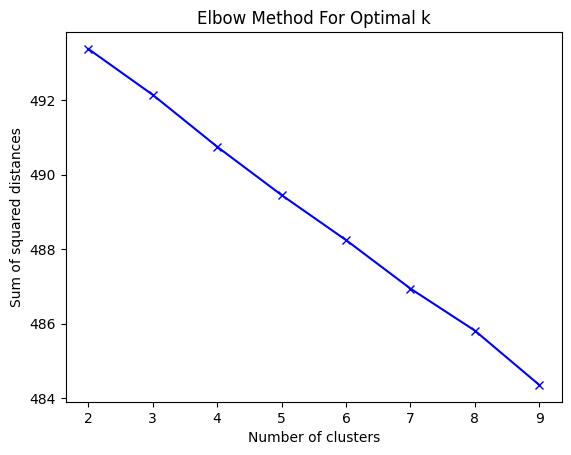

In [91]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Ở đây, số cụm hầu như là tuyến tính nên bản thân em chọn 3 cụm để đưa ra nhiều góc nhìn về các keywords.

In [108]:
# Get clusters
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
game_cluster = pd.DataFrame(list(zip(df['Short Description'],labels)),columns=['title','cluster'])

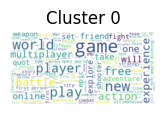

In [112]:
from wordcloud import WordCloud

for k in range(true_k):
    text = game_cluster[game_cluster.cluster == k]['title'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)

   # Create subplot
    plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
    plt.plot()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
plt.show()

Các từ khóa trong wordcloud sẽ được quan tâm và đưa vào phần giới thiệu của game. Việc phân tích này còn giúp ích cho việc game dễ tìm kiếm hơn so với việc không thêm những keyword phổ biến.